## Import Data

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
import pandas as pd

# Mengimpor data dari file CSV ke dalam DataFrame
file_path = r'C:\Users\naufa\Downloads\Training\Reddit\Suicide_Detection.csv'
data = pd.read_csv(file_path, encoding='utf-8')
data

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


# Merapihkan data

In [21]:
# penamaan kolom Unnamed
data.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
# Ganti label
data['class'] = data['class'].replace({'suicide': 1, 'non-suicide': 0})
# hapus kolom id
data=data.drop('id', axis=1)
data

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",1
...,...,...
232069,If you don't like rock then your not going to ...,0
232070,You how you can tell i have so many friends an...,0
232071,pee probably tastes like salty tea😏💦‼️ can som...,0
232072,The usual stuff you find hereI'm not posting t...,1


## Pemotongan data (balancing)


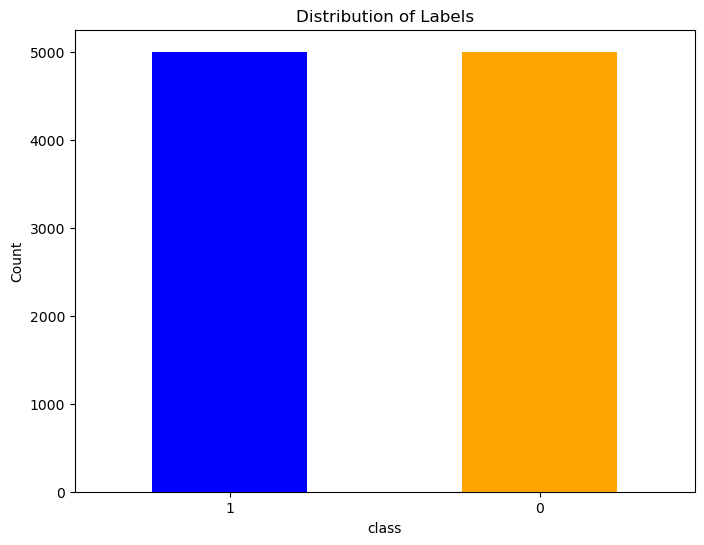

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split the data into two subsets based on the class label
data_class_0 = data[data['class'] == 0]
data_class_1 = data[data['class'] == 1]

# Specify the desired number of rows for each class
desired_rows_per_class = 5000  # 15,000 / 2

# Sample a subset from each class
sampled_data_class_0 = data_class_0.sample(n=desired_rows_per_class, random_state=42)
sampled_data_class_1 = data_class_1.sample(n=desired_rows_per_class, random_state=42)

# Combine the sampled subsets
data = pd.concat([sampled_data_class_0, sampled_data_class_1])

# Shuffle the combined dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the sampled dataset
data

plt.figure(figsize=(8, 6))
data['class'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Distribution of Labels')
plt.xlabel('class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


## Text Preprocessing

In [23]:
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

# Download resources for NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Remove URLs and special characters using regex
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenization using nltk
    words = word_tokenize(text)

    # Remove stopwords using nltk
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Stemming using Snowball
    #stemmer = SnowballStemmer('english')
    #words = [stemmer.stem(word) for word in words]

    # Lemmatization using WordNetLemmatizer
    #lemmatizer = WordNetLemmatizer()
    #words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a single string
    preprocessed_text = ' '.join(words)

    return preprocessed_text

# Apply the preprocessing function to the 'text' column in your dataset
data['text'] = data['text'].apply(preprocess_text)
data


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naufa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naufa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\naufa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,class
0,dont want live another dayyou know everyday hu...,1
1,true story subtitles video covid youtube overn...,0
2,instagram bios p proud father virgin loves god...,0
3,officially christmas merry christmas everyone ...,0
4,every journey begins single step step secure keys,0
...,...,...
9995,im failure always failureeverything wrong im d...,1
9996,im tryingthe thing keeps killing fact im scare...,1
9997,time comeim going year probably eventually mak...,1
9998,sleeping awake filler filler filler filler filler,0


# Word Cloud

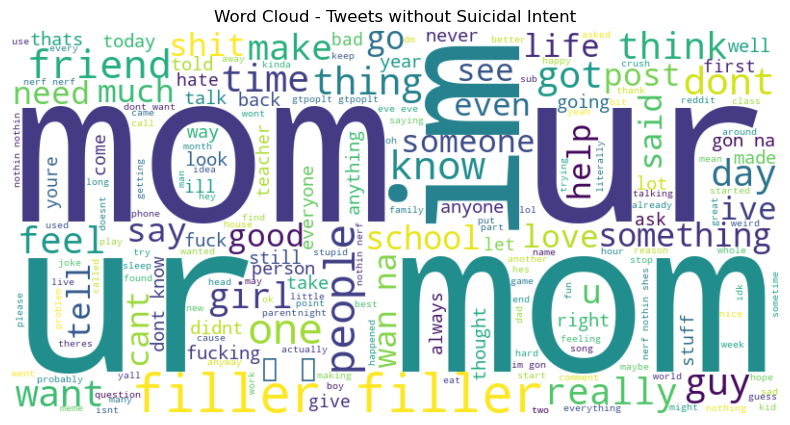

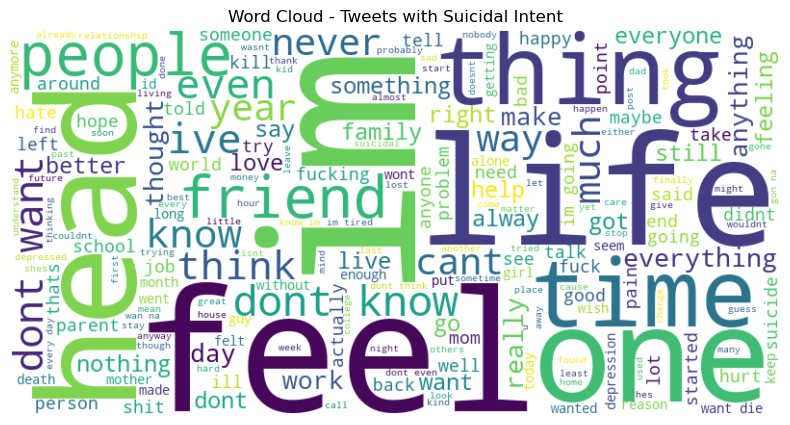

In [24]:
from wordcloud import WordCloud

# Filter tweets based on labels (0 for no suicidal intent, 1 for suicidal intent)
no_suicide_tweets = data[data['class'] == 0]['text']
suicide_tweets = data[data['class'] == 1]['text']

# Function to generate and display word cloud
def generate_word_cloud(text_data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# word cloud for tweets without suicidal intent
generate_word_cloud(no_suicide_tweets, 'Word Cloud - Tweets without Suicidal Intent')
# word cloud for tweets with suicidal intent
generate_word_cloud(suicide_tweets, 'Word Cloud - Tweets with Suicidal Intent')


# Classification Model

## 1. Naive Bayes vs LSTM+BERT
#### Naive Bayes using TF-IDF

Naive Bayes Accuracy: 86.5 %
Epoch 1/5
50/50 [==============================] - 5s 60ms/step - loss: 0.5146 - accuracy: 0.7722 - val_loss: 0.3541 - val_accuracy: 0.8775
Epoch 2/5
50/50 [==============================] - 3s 51ms/step - loss: 0.2241 - accuracy: 0.9289 - val_loss: 0.2563 - val_accuracy: 0.9119
Epoch 3/5
50/50 [==============================] - 3s 51ms/step - loss: 0.1197 - accuracy: 0.9673 - val_loss: 0.2349 - val_accuracy: 0.9175
Epoch 4/5
50/50 [==============================] - 3s 51ms/step - loss: 0.0689 - accuracy: 0.9842 - val_loss: 0.2351 - val_accuracy: 0.9162
Epoch 5/5
63/63 [==============================] - 1s 9ms/step - loss: 0.2375 - accuracy: 0.9210
LSTM Accuracy: 92.10000038146973 %


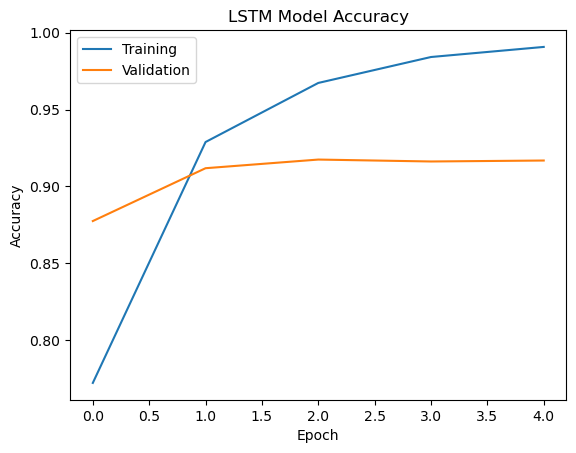

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data['text'], data['class'], test_size=0.2, random_state=42)

# Vectorization using FastText
vectorizer = CountVectorizer(analyzer='word', tokenizer=lambda x: x.split(), preprocessor=lambda x: x)
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

# Naive Bayes Model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(train_vectors, train_labels)

# Evaluate Naive Bayes model
naive_bayes_accuracy = naive_bayes_model.score(test_vectors, test_labels)
print(f"Naive Bayes Accuracy: {naive_bayes_accuracy*100} %")

# Tokenization using BERT for LSTM
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
train_encodings = tokenizer(train_data.tolist(), truncation=True, padding=True, max_length=64, return_tensors='tf')
test_encodings = tokenizer(test_data.tolist(), truncation=True, padding=True, max_length=64, return_tensors='tf')

# LSTM Model
max_len = 64  # Adjust as needed
train_sequences = pad_sequences(train_encodings['input_ids'], maxlen=max_len)
test_sequences = pad_sequences(test_encodings['input_ids'], maxlen=max_len)

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.get_vocab()), output_dim=32, input_length=max_len))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM model
history = lstm_model.fit(train_sequences, train_labels, epochs=5, batch_size=128, validation_split=0.2)

# Evaluate LSTM model
lstm_accuracy = lstm_model.evaluate(test_sequences, test_labels)[1]
print(f"LSTM Accuracy: {lstm_accuracy*100} %")

# Plot accuracy and validation accuracy for LSTM
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()


## 2. Naive Bayes vs LSTM 
#### Both Using TF-IDF

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Naive Bayes Accuracy: 86.5 %


Epoch 1/5


50/50 [==============================] - 151s 3s/step - loss: 0.6127 - accuracy: 0.7006 - val_loss: 0.4694 - val_accuracy: 0.8044
Epoch 2/5
50/50 [==============================] - 141s 3s/step - loss: 0.4607 - accuracy: 0.8139 - val_loss: 0.3475 - val_accuracy: 0.8712
Epoch 3/5
50/50 [==============================] - 140s 3s/step - loss: 0.2777 - accuracy: 0.9106 - val_loss: 0.2919 - val_accuracy: 0.8913
Epoch 4/5
50/50 [==============================] - 140s 3s/step - loss: 0.1990 - accuracy: 0.9397 - val_loss: 0.2647 - val_accuracy: 0.9050
Epoch 5/5
63/63 [==============================] - 17s 269ms/step - loss: 0.2663 - accuracy: 0.9025
LSTM Accuracy: 0.90


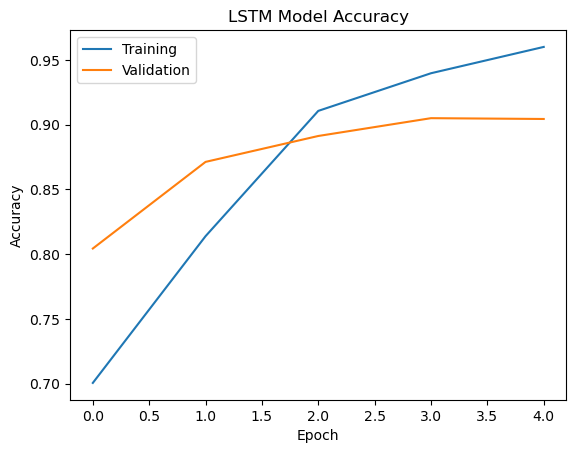

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data['text'], data['class'], test_size=0.2, random_state=42)

# Vectorization using FastText
vectorizer = CountVectorizer(analyzer='word', tokenizer=lambda x: x.split(), preprocessor=lambda x: x)
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

# Naive Bayes Model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(train_vectors, train_labels)

# Evaluate Naive Bayes model
naive_bayes_accuracy = naive_bayes_model.score(test_vectors, test_labels)
print(f"Naive Bayes Accuracy: {naive_bayes_accuracy*100} %")

# LSTM Model
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data)
train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

max_len = max(len(sequence) for sequence in train_sequences)
train_sequences = pad_sequences(train_sequences, maxlen=max_len)
test_sequences = pad_sequences(test_sequences, maxlen=max_len)

lstm_model = Sequential()
lstm_model.add(Embedding(max_words, 32, input_length=max_len))
lstm_model.add(LSTM(25))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM model
history = lstm_model.fit(train_sequences, train_labels, epochs=5  , batch_size=128, validation_split=0.2)

# Evaluate LSTM model
lstm_accuracy = lstm_model.evaluate(test_sequences, test_labels)[1]
print(f"LSTM Accuracy: {lstm_accuracy:.2f}")

# Plot accuracy and validation accuracy for LSTM
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()


In [63]:
from sklearn.metrics import classification_report

# Naive Bayes Model
naive_bayes_predictions = naive_bayes_model.predict(test_vectors)
print("Naive Bayes Classification Report:")
print(classification_report(test_labels, naive_bayes_predictions))

# LSTM Model
lstm_probabilities = lstm_model.predict(test_sequences)
lstm_predictions = (lstm_probabilities > 0.5).astype(int)
print("LSTM Classification Report:")
print(classification_report(test_labels, lstm_predictions))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      1013
           1       0.80      0.97      0.88       987

    accuracy                           0.86      2000
   macro avg       0.88      0.87      0.86      2000
weighted avg       0.88      0.86      0.86      2000

63/63 [==============================] - 1s 9ms/step
LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1013
           1       0.93      0.91      0.92       987

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



### Simpan skor Naive Bayes & LSTM to excel

In [63]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy and classification report for LSTM
lstm_accuracy = accuracy_score(test_labels, lstm_predictions)
lstm_report = classification_report(test_labels, lstm_predictions, output_dict=True)

# Create a DataFrame for LSTM report
lstm_df = pd.DataFrame(lstm_report).transpose()

# Save LSTM report to Excel
lstm_df.to_excel("lstm_report.xlsx")

# Calculate accuracy and classification report for Naive Bayes
naive_bayes_accuracy = accuracy_score(test_labels, naive_bayes_predictions)
naive_bayes_report = classification_report(test_labels, naive_bayes_predictions, output_dict=True)

# Create a DataFrame for Naive Bayes report
naive_bayes_df = pd.DataFrame(naive_bayes_report).transpose()

# Save Naive Bayes report to Excel
naive_bayes_df.to_excel("naive_bayes_report.xlsx")


## XGBoost hyperparameter tuning (sudah dilakukan)

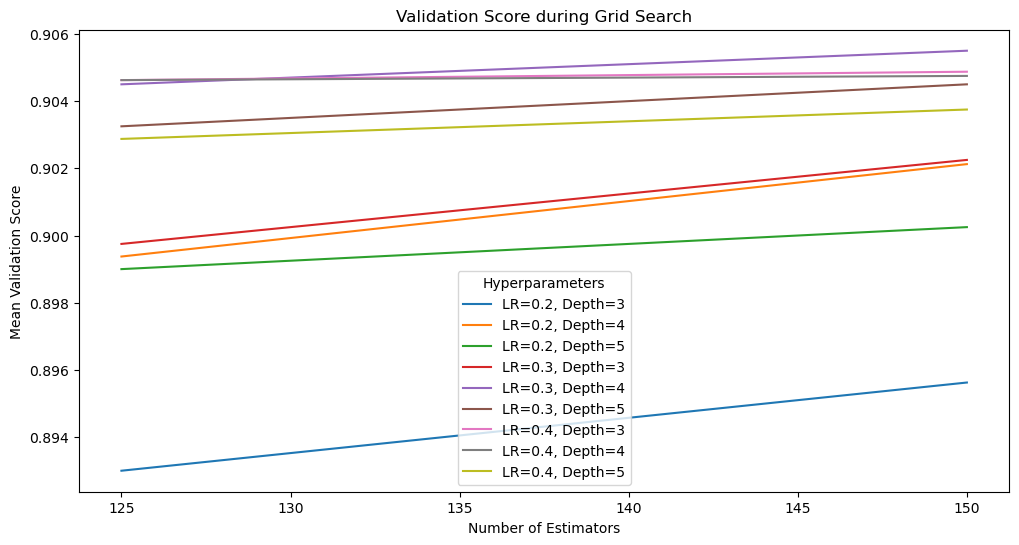

NameError: name 'score' is not defined

In [71]:
# Tokenisasi dan vektorisasi 
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, data['class'], test_size=0.2, random_state=42)

# Membuat model XGBoost
model = XGBClassifier()

# Mendefinisikan hyperparameter yang akan di-tune
param_grid = {
    'learning_rate': [0.2, 0.3, 0.4],
    'max_depth': [3, 4, 5],
    'n_estimators': [125, 150],
}

# Grid Search untuk hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

import matplotlib.pyplot as plt
import numpy as np

# Menyimpan hasil grid search ke dalam DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Melihat best estimator
best_model = grid_search.best_estimator_

# Membuat prediksi
y_pred = best_model.predict(X_test)

# Menghitung dan menyimpan skor
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Menyimpan skor ke dalam Excel
scores = pd.DataFrame({'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall]})
#scores.to_excel('evaluation_scores.xlsx', index=False)

# Plot skor validasi untuk setiap kombinasi hyperparameter
plt.figure(figsize=(12, 6))

# Plot skor validasi untuk setiap kombinasi hyperparameter
for learning_rate in param_grid['learning_rate']:
    for max_depth in param_grid['max_depth']:
        subset = results[(results['param_learning_rate'] == learning_rate) & (results['param_max_depth'] == max_depth)]
        plt.plot(subset['param_n_estimators'], subset['mean_test_score'], label=f'LR={learning_rate}, Depth={max_depth}')

plt.title('Validation Score during Grid Search')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Validation Score')
plt.legend(title='Hyperparameters')
plt.show()

scores

### Best model 

In [72]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## 3. Naive Bayes vs XGBoost Classifier
#### Both Using TF-IDF 

In [64]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, data['class'], test_size=0.2, random_state=42)

# Model Naive Bayes
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Prediksi dengan Naive Bayes
nb_pred = naive_bayes_model.predict(X_test)

# Lihat skor Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy*100} %")

# Naive Bayes report
print("Naive Bayes Report:")
print(classification_report(y_test, nb_pred))

# Model XGBoost (parameter terbaik dari hasil hyperparameter tuning)
xgb_model = XGBClassifier(learning_rate=0.3, max_depth=4, n_estimators=125)
xgb_model.fit(X_train, y_train)

# Membuat prediksi dengan XGBoost
xgb_pred = xgb_model.predict(X_test)

# Lihat skor XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy*100} %")

# XGBoost report
print("XGBoost Report:")
print(classification_report(y_test, xgb_pred))

# Menampilkan skor
xgb_scores = pd.DataFrame({'Accuracy': [xgb_accuracy], 'Precision': [xgb_precision], 'Recall': [xgb_recall]})
nb_scores = pd.DataFrame({'Accuracy': [nb_accuracy], 'Precision': [nb_precision], 'Recall': [nb_recall]})

Naive Bayes Accuracy: 81.35 %
Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.97      0.65      0.78      1013
           1       0.73      0.98      0.84       987

    accuracy                           0.81      2000
   macro avg       0.85      0.82      0.81      2000
weighted avg       0.85      0.81      0.81      2000

XGBoost Accuracy: 89.35 %
XGBoost Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1013
           1       0.92      0.86      0.89       987

    accuracy                           0.89      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



### Simpan hasil skor

In [17]:
# Calculate accuracy and classification report for Naive Bayes
xgb_report = classification_report(y_test, y_pred, output_dict=True)
xgb_df = pd.DataFrame(xgb_report).transpose()
xgb_df.to_excel("xgb_report.xlsx")

# Calculate accuracy and classification report for Naive Bayes
nb_report = classification_report(y_test, nb_pred, output_dict=True)
nb_df = pd.DataFrame(nb_report).transpose()
nb_df.to_excel("nb_report.xlsx")

In [64]:
xgb_scores

,Accuracy,Precision,Recall
0,0.899,0.924324,0.866261


In [52]:
nb_scores

,Accuracy,Precision,Recall
0,0.8165,0.735562,0.98075


In [73]:
scores

,Accuracy,Precision,Recall
0,0.8975,0.919528,0.868288
